<a href="https://colab.research.google.com/github/ringgoagsya/latihan_python/blob/main/Scikit_Learn_23April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing Scikit-Learn

## Data Representation in Scikit-Learn

### Data as table

mempersiapkan import library seaborn dengan alias (as) sns untuk mempersingkat kodingan

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


menampilkan iris.head() merupakan 5 data pertama dari dataset('iris')

#### Features Matrix

Tata letak tabel ini memperjelas bahwa informasi dapat dianggap sebagai array atau matriks numerik dua dimensi, yang akan kita sebut * Features Matrix *.
Sesuai ketentuan, Features Matrix ini sering disimpan dalam variabel bernama X.
Features Matrix diasumsikan dua dimensi, dengan bentuk `` [n_samples, n_features] ``, dan paling sering dimuat dalam array NumPy atau Pandas` `DataFrame``, meskipun beberapa model Scikit-Learn juga menerima SciPy matriks jarang.

Sampel ( baris) selalu mengacu pada objek individual yang dijelaskan oleh kumpulan data.
Misalnya, sampel mungkin berupa bunga, orang, dokumen, gambar, file suara, video, objek astronomi, atau apa pun yang dapat Anda gambarkan dengan serangkaian pengukuran kuantitatif.

Features (kolom) selalu mengacu pada pengamatan berbeda yang menggambarkan setiap sampel secara kuantitatif.
Features  umumnya bernilai nyata, tetapi mungkin Boolean atau nilai diskrit dalam beberapa kasus.

#### Array target

Scikit-Learn menangani beberapa nilai target dalam bentuk array target dua dimensi, `` [n_samples, n_target] `, kami terutama akan bekerja dengan kasus umum dari array target satu dimensi.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


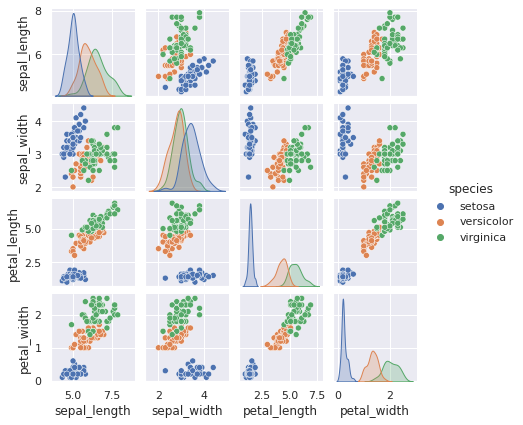

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

%matplotlib inline merupakan magic function yang dimiliki python untuk menggunakan matplotlib lebih cepat lagi.
import seaborn as sns; sns.set() merupakan untuk mengimport library seaborn dengan alias (as) sns supaya mempersingkat kodingan dan sns.set() untuk mengimport set data dari library tsbt

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

iris.drop digunakan untuk Memisahkan data yang merupakan fitur dengan data yang merupakan label kelas. Untuk memisahkan data tersebut, maka dapat digunakan method “drop”. Jika method drop() digunakan untuk menghapus kolom, maka sebutkan nama kolom yang ingin dihapus dan set nilai Axis=1 . Sedangkan jika baris yang ingin dihapus maka tetapkan nilai Axis=0. Untuk data yang merupakan fitur disimpan pada variabel X, sedangkan data yang merupakan label kelas disimpan pada variabel y. 
fungsi shape() untuk:
Mengetahui jumlah kolom dan baris dari data.
Data kita mempunyai 4 kolom dengan 150 baris. setelah kita drop tabel species untuk dijadikan sumbu Y

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

dan memasukkan y_iris sebagai species. dan y_iris.shape digunakan untuk melohat ukuran darri array tersebut disana ada 150 baris dan satu kolom species saja

## Scikit-Learn's Estimator API

### Supervised learning example: Simple linear regression

Sebagai contoh dari proses ini, mari kita pertimbangkan regresi linier sederhana — yaitu, kasus umum pemasangan baris ke $ (x, y) $ data.
Kami akan menggunakan data sederhana berikut untuk contoh regresi:

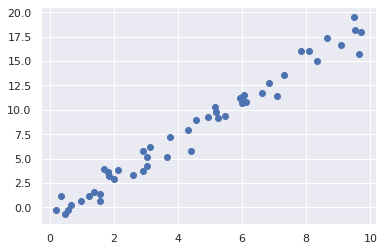

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);


rng digunakan untuk menyimpan angka randomState(42) yang membuat angka random yang sama walaupun di running secara ulang, inilah jadi keunggulan RandomState.
untuk nilai X merupakan hasil dari 10 x randomState 
dan Y dari 2 x X dikurangi 1+randomState.
Untuk menampilkan Scater Plot menggunakan key plt.scatter(x,y)
dimana X sebagai sumbu X dan Y sebagai sumbu Y

#### 1. Choose a class of model

Dalam Scikit-Learn, setiap kelas model diwakili oleh kelas Python.
Jadi, misalnya, jika kita ingin menghitung model regresi linier sederhana, kita dapat mengimpor kelas regresi linier:

In [ ]:
from sklearn.linear_model import LinearRegression

mengimport LiniearRegression dari sklearn.linear_model libbrary yang akan secara otomatis menggunakan algoritma regresi liner nantiknya

#### 2. Choose model hyperparameters


In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Memasukkan model sebagai algoritma linearRegresion yang akan kita gunakan nantiknya

#### 3. Arrange data into a features matrix and target vector

Sebelumnya telah mengisialisasi data Scikit-Learn, yang membutuhkan features matrix dua dimensi dan array target satu dimensi.
Di sini variabel target kita `` y`` sudah dalam bentuk yang benar (a lenght-``n_sampel``), tetapi kita perlu memijat data `` x`` untuk menjadikannya matriks dengan ukuran `` [n_samples , n_features] `.
Dalam hal ini, ini berarti pembentukan kembali sederhana dari array satu dimensi:

In [ ]:
X = x[:, np.newaxis]
X.shape

(50, 1)

X dengan baris sebanyak 50 dan 1 kolom memuat nilai x dengan newaxis

#### 4. Fit the model to your data

Sekarang saatnya menerapkan model kita ke data.
Ini dapat dilakukan dengan metode `` fit () `dari model:

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

fungsi `` fit () ``ini menyebabkan sejumlah komputasi internal yang bergantung pada model berlangsung, dan hasil komputasi ini disimpan dalam atribut khusus model yang dapat dieksplorasi pengguna.
Dalam Scikit-Learn, dengan konvensi semua parameter model yang dipelajari selama proses `` fit ()``memiliki garis bawah; misalnya dalam model linier ini, kami memiliki yang berikut:

In [ ]:
model.coef_

array([1.9776566])

untuk melihat koefisien dari dari model tadi menggunakan fungsi coef (m)

In [ ]:
model.intercept_

-0.90331072553111635

untuk melihat intercept dari dari model tadi menggunakan fungsi intercept_ (b). yang beguna untuk menentukan nilai Y nantiknya dengan rumus Y= m-b

#### 5. Predict labels for unknown data

menggunakan fungsi predict() pada python

In [ ]:
xfit = np.linspace(-1, 11)

Seperti sebelumnya, kita perlu memaksakan nilai * x * ini ke dalam matriks fitur `` [n_samples, n_features] ``, setelah itu kita dapat memasukkannya ke model:

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
Xfit.shape

(50, 1)

meningkatkan dimensi dimana Xfit butuh 2 dimensi sehingga kita menggunakan np.newaxis yang membuat menjadi array 2 dimensi dan menjadikan np.newaxis sebagai kolom.
yfit=model.predict(Xfit) digunakan untuk menyimpan data prediksi menggunakan linearRegresion yang sudah di masukkan ke variabel model dan data yg diuji adalah Xfit

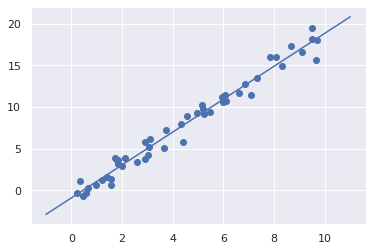

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Maka akan bisa kita membandingkan antara scater plot dengan linier regression yang berbanding lurus ke atas yang membuat data x dan y berkorelasi.
Biasanya keefektifan model dievaluasi dengan membandingkan hasilnya dengan beberapa baseline yang diketahui, seperti yang akan kita lihat pada contoh berikutnya

### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [ ]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

ModuleNotFoundError: ignored

karena libbrary tersebut belum tersedia di google colab maka saya akan mencoba menginstalnya seperti dibawha ini.

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive) 

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Requirement already up-to-date: libarchive in /usr/local/lib/python3.7/dist-packages (0.4.7)


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

#Lanjutan Sklearn

Karena masih error saya mengambil from sklearn.model_selection import train_test_split sebagai import an nya

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

dan alhasil kita berhasil mengimport library train_test_split dari sklearn.model_selection

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Selanjutnya kita mengimport GaussianNB dari sklearn.naive_bayes.
 kita menyimpan algoritma GaussianNB di variabel model
 kemudian mengaplikasikan ke data kita sebelumnya dan kita coba predict lagi

fungsi ``accuracy_score`` yang diimport dari sklearn.metrics untuk melihat akursi score prediksi 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Akurasi yang kita miliki 97%,dapat dilihat bahwa algoritme naive bayes ini pun efektif.

### Unsupervised learning example: Iris dimensionality

Mempelajari unsupervised learning dengan mengimport PCA

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

dengan mengimport PCA dari sklearn.decomposition.
memasukan PCA(dengan n_components=2 maksudnya yaitu mengubah ke data 2 dimensi) jika ingin ke 3 dimensi bisa menggunakan n_components=3. 

model.fit(X_iris) untuk menguji algoritma pca ke X_iris.

X_2D=model.transform(X_iris) menyimpan data yang telah di transformasikan ke data 2 dimensi

Sekarang mari kita plot hasilnya. Cara cepat untuk melakukan ini adalah dengan memasukkan hasil ke Iris asli `` DataFrame``, dan menggunakan "lmplot`` Seaborn untuk menunjukkan hasil:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


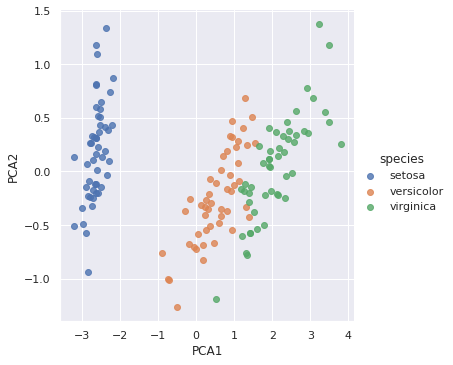

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

dapat dilihat bahwa dalam representasi dua dimensi, spesies dipisahkan dengan cukup baik berdasarkan warna dan juga diberi label, meskipun algoritma PCA tidak memiliki pengetahuan tentang label spesies.
Ini menunjukkan kepada kami bahwa klasifikasi yang relatif mudah mungkin akan efektif pada kumpulan data, seperti yang kita lihat sebelumnya.

### Unsupervised learning: Iris clustering

Selanjutnya mari kita lihat penerapan pengelompokan ke data Iris.
Algoritme pengelompokan mencoba menemukan grup data yang berbeda tanpa referensi ke label apa pun.
Di sini kita akan menggunakan metode pengelompokan yang kuat yang disebut model campuran Gaussian (GMM)

In [ ]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

ImportError: ignored

karena library nya belum terinstal di google colab. mari kita coba kodingan import yang baru

In [ ]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

alhasil import berhasil dilakukan dengan mengubah cara import. seperti diatas.
dengan mengimport GMM dengan mixture.GaussianMixture dari sklearn.
memasukan mixture.GaussianMixture(dengan n_components=3 maksudnya yaitu mengubah ke data 3 dimensi) jika ingin ke 2 dimensi bisa menggunakan n_components=2. 

model.fit(X_iris) untuk menguji algoritma GMM ke X_iris.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


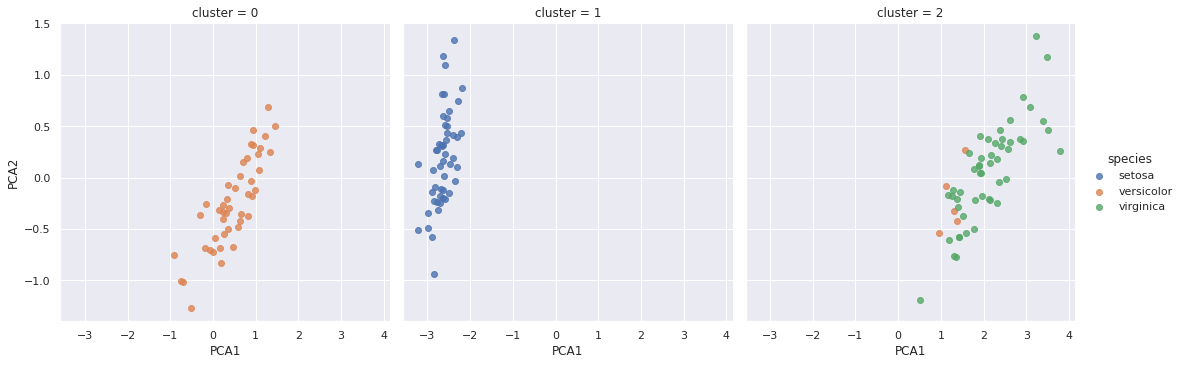

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);


Dengan memisahkan data dengan nomor cluster, dapat dilihat bahwa seberapa baik algoritma GMM memulihkan label yang mendasarinya: spesies * setosa * dipisahkan dengan sempurna di dalam cluster 0, sementara masih ada sedikit pencampuran antara * versicolor * dan * virginica * .
Ini berarti bahwa bahkan tanpa seorang ahli memberi tahu kami label spesies masing-masing bunga, pengukuran bunga-bunga ini cukup berbeda sehingga kami dapat * secara otomatis * mengidentifikasi keberadaan berbagai kelompok spesies ini dengan algoritma pengelompokan sederhana!
Algoritma semacam ini selanjutnya dapat memberikan petunjuk kepada para ahli di lapangan tentang hubungan antara sampel yang mereka amati.

## Application: Exploring Hand-written Digits

Untuk mendemonstrasikan prinsip-prinsip ini pada masalah yang lebih menarik, mari pertimbangkan satu bagian dari masalah pengenalan karakter optik: identifikasi angka tulisan tangan.
Di dunia nya, masalah ini melibatkan penempatan dan pengidentifikasian karakter dalam gambar. Di sini kita akan mengambil jalan pintas dan menggunakan set digit yang telah diformat sebelumnya dari Scikit-Learn, yang dibangun ke dalam perpustakaan.

### Loading and visualizing the digits data

menggunakan load_digits() dari library sklearn.datasets

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Data gambar adalah array tiga dimensi: 1.797 sampel masing-masing terdiri dari  8 × 8 grid per pixel
Mari kita visualisasikan seratus yang pertama dari ini:

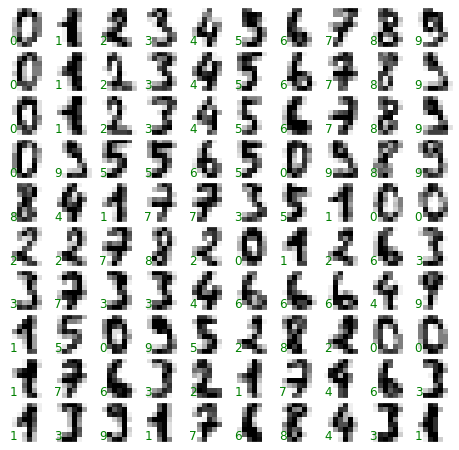

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Untuk bekerja dengan data ini dalam Scikit-Learn, kita membutuhkan representasi dua dimensi, ``[n_samples, n_features]``.
Kita dapat melakukannya dengan memperlakukan setiap piksel pada gambar sebagai fitur: yaitu, dengan meratakan larik piksel sehingga kita memiliki larik nilai piksel dengan panjang 64 yang mewakili setiap digit.
Selain itu, kita membutuhkan larik target, yang memberikan label yang telah ditentukan sebelumnya untuk setiap digit.
Kedua kuantitas ini dibangun ke dalam kumpulan data digit di bawah atribut `` data `` dan `` target ``, masing-masing:

In [ ]:
X = digits.data
X.shape

(1797, 64)

X yang menyimpan digits.data mempunyai data baris sejumlah 1797 dan kolom sebanyak 64

In [ ]:
y = digits.target
y.shape

(1797,)

Y yang menyimpan digits.target sebagai sumbu Y mempunyai data baris sejumlah 1797 dalam 1 kolom sajja

### Unsupervised learning: Dimensionality reduction

Mencoba memvisualisasikan titik kami dalam ruang parameter 64 dimensi, tetapi sulit untuk memvisualisasikan titik secara efektif dalam ruang berdimensi tinggi seperti itu.
Sebagai gantinya kami akan mengurangi dimensi menjadi 2, menggunakan metode Unsupervised Learning : dimensionality Reduction.
Di sini, kita akan menggunakan algoritma pembelajaran berjenis yang disebut * Isomap *  dan mengubah data menjadi dua dimensi:

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

mengimport Isomap dari library sklearn.manifold
iso = Isomap(n_components=2) artinya menyimpan algoritma Isomap dalam variabel iso dengan menjadikan data 2 dimensi (n_components=2).
iso.fit(digits.data) artinya memasukkan data digits.data ke algoritma Isomap.
data_projected = iso.transform(digits.data) adalah mentransformasikan algoritma tadi dan menyimpan dalam varibel data_projected.
data_projected.shape yaitu melihat berapa ukuran array kita berapa baris dan kolomnya dan dapat dilihat baris 1979 dan 2 kolom berarti data telah menjadi 2 dimensi

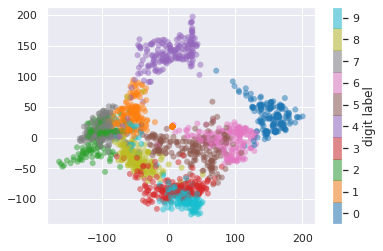

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], 
            c=digits.target,
            edgecolor = 'none', alpha= 0.5,
            cmap = plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

karena error type warna spectral nya maka saya ganti dengan tab10 untuk pewarnaan nya.
plt.scatter(data_projected[:, 0], data_projected[:, 1], 
            c=digits.target,
            edgecolor = 'none', alpha= 0.5,
            cmap = plt.cm.get_cmap('tab10', 10))
adalah untuk menginisialiasai data yang akan divisualisasikan dengan sumbu x yaitu data_projected semua baris dan kolom dari index kolom. untuk warna dimabil dari cmap 'tab10' berjumlah 10 warna.
plt.colorbar(label='digit label', ticks = range(10)) adalah untuk pelabelan warna dengan angka 0-9 menggunakan fungsi range(10).
plt.clim(-0.5, 9.5) untuk meletakan posisi dari label tadi

### Classification on digits

menerapkan classification algorithm to the digits.
Seperti data Iris sebelumnya, kami akan membagi data menjadi set pelatihan dan pengujian, dan menyesuaikan model Gaussian naive Bayes:

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

dengan mengimport GaussianNB dari sklearn.naive_bayes.
memasukan GaussianNB() ke dalam variabel model. 
model.fit(X_train, ytrain) untuk menguji algoritma ini ke X_iris dan ytran.
y_model = model.predict(Xtest) untuk menguji prediksi keakuratan yang disimpan dalam variabel y_model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

dilihat bahwa akurasi sekitar 83% untuk klasifikasi digit!
Namun, angka tunggal ini tidak memberi tahu kita * di mana * kesalahan kita.yang dapat kita hitung dengan Scikit-Learn dan plot dengan Seaborn

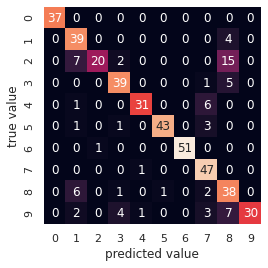

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Ini menunjukkan kepada kita di mana titik-titik yang salah diberi label cenderung berada: misalnya, sejumlah besar titik berpasangan di sini salah diklasifikasikan sebagai satu atau delapan.
Cara lain untuk mendapatkan intuisi tentang karakteristik model adalah dengan memplot input lagi, dengan label yang diprediksi.
Kami akan menggunakan hijau untuk label yang benar, dan merah untuk label yang salah:

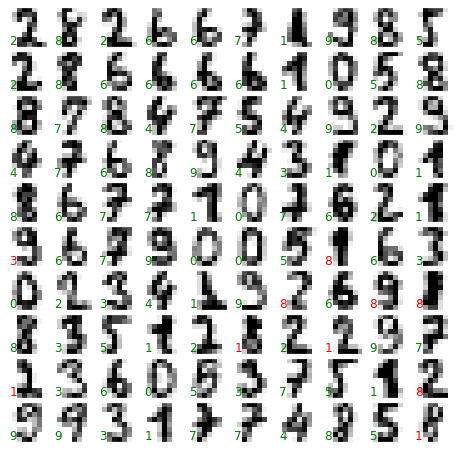

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

dapat dilihat dari output dari angka tersebut yang salahh ditandai dengan angka berwarna merah dan yang benar ditandai dengan angka berwarna hijau.

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
// digunakan untuk mengatus gambar dari subplot

test_images = Xtest.reshape(-1, 8, 8)
//digunakan untuk mengatur reshape dari image

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')
// memberikan pewarnaan jika benar diberi warna green/ hijau dan yang salah menggunakan warna red/merah

# Hyperparameters and Model Validation

## Thinking about Model Validation

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

The following sections first show a naive approach to model validation and why it
fails, before exploring the use of holdout sets and cross-validation for more robust
model evaluation.

### Model validation the wrong way

Let's demonstrate the naive approach to validation using the Iris data, which we saw in the previous section.
We will start by loading the data:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Next we choose a model and hyperparameters. Here we'll use a *k*-neighbors classifier with ``n_neighbors=1``.
This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point:"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Then we train the model, and use it to predict labels for data we already know:

In [ ]:
model.fit(X, y)
y_model = model.predict(X)

Finally, we compute the fraction of correctly labeled points:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model!
But is this truly measuring the expected accuracy? Have we really come upon a model that we expect to be correct 100% of the time?

As you may have gathered, the answer is no.
In fact, this approach contains a fundamental flaw: *it trains and evaluates the model on the same data*.
Furthermore, the nearest neighbor model is an *instance-based* estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy *every time!*

### Model validation the right way: Holdout sets

So what can be done?
A better sense of a model's performance can be found using what's known as a *holdout set*: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.
This splitting can be done using the ``train_test_split`` utility in Scikit-Learn:

In [ ]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.90666666666666662

We see here a more reasonable result: the nearest-neighbor classifier is about 90% accurate on this hold-out set.
The hold-out set is similar to unknown data, because the model has not "seen" it before.

### Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.
In the above case, half the dataset does not contribute to the training of the model!
This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use *cross-validation*; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.
Visually, it might look something like this:

![](figures/05.03-2-fold-CV.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#2-Fold-Cross-Validation)

Here we do two validation trials, alternately using each half of the data as a holdout set.
Using the split data from before, we could implement it like this:

In [ ]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.95999999999999996, 0.90666666666666662)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance.
This particular form of cross-validation is a *two-fold cross-validation*—that is, one in which we have split the data into two sets and used each in turn as a validation set.

We could expand on this idea to use even more trials, and more folds in the data—for example, here is a visual depiction of five-fold cross-validation:

![](figures/05.03-5-fold-CV.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#5-Fold-Cross-Validation)

Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.
This would be rather tedious to do by hand, and so we can use Scikit-Learn's ``cross_val_score`` convenience routine to do it succinctly:

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the ``cross_validation`` module.
For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial.
This type of cross-validation is known as *leave-one-out* cross validation, and can be used as follows:

In [ ]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

Because we have 150 samples, the leave one out cross-validation yields scores for 150 trials, and the score indicates either successful (1.0) or unsuccessful (0.0) prediction.
Taking the mean of these gives an estimate of the error rate:

In [ ]:
scores.mean()

0.95999999999999996

Other cross-validation schemes can be used similarly.
For a description of what is available in Scikit-Learn, use IPython to explore the ``sklearn.cross_validation`` submodule, or take a look at Scikit-Learn's online [cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html).